# Pima Indian diabetes prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

# Read .csv
diabetes_data = pd.read_csv("../diabetes.csv")
print(diabetes_data["Outcome"].value_counts())
diabetes_data.head(5)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# information of data types
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
def get_clf_eval(y_test, prd=None, prd_proba=None):
    confusion = confusion_matrix(y_test, prd)
    accuracy = accuracy_score(y_test, prd)
    precision = precision_score(y_test, prd)
    recall = recall_score(y_test, prd)
    f1 = f1_score(y_test, prd)
    roc_auc = roc_auc_score(y_test, prd_proba)
    print("confusion matrix: \n", confusion)
    print("accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, ROC-AUC: {4:.4f}"
          .format(accuracy, precision, recall, f1, roc_auc))

In [7]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# fit using LogisticRegression
lr_clf = LogisticRegression(solver="liblinear")
lr_clf.fit(X_train, y_train)
prd = lr_clf.predict(X_test)
prd_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, prd, prd_proba)

confusion matrix: 
 [[87 13]
 [22 32]]
accuracy: 0.7727, precision: 0.7111, recall: 0.5926, f1: 0.6465, ROC-AUC: 0.8083


In [8]:
def precision_recall_curve_plot(y_test, prd_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, prd_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle="--", label="precision")
    plt.plot(thresholds, recalls[0:threshold_boundary], label="recall")

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall Value")
    plt.legend()
    plt.grid()

    plt.show()

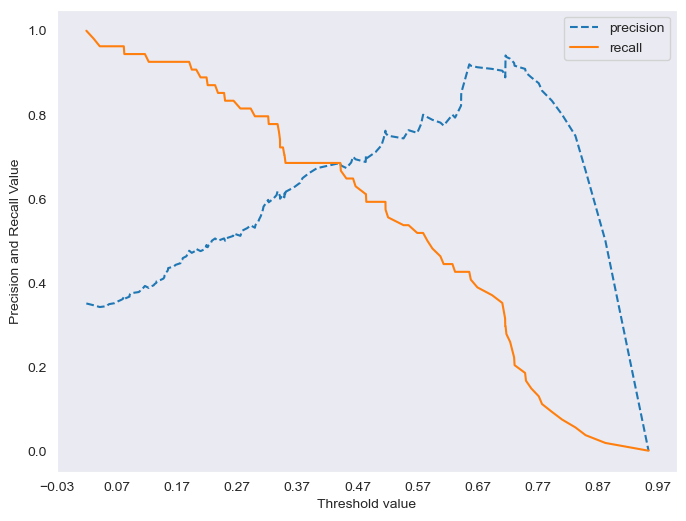

In [9]:
prd_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, prd_proba_c1)

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


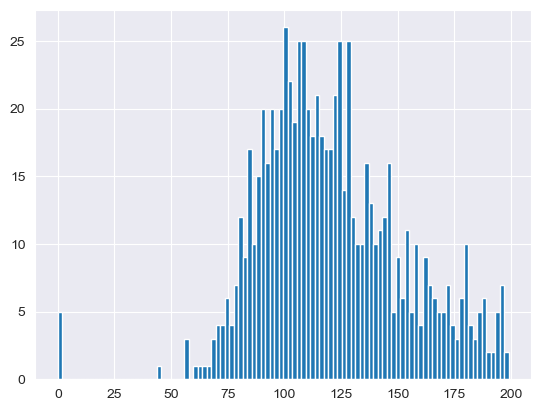

In [11]:
# Glucose cannot be zero
plt.hist(diabetes_data["Glucose"], bins=100)
plt.show()

In [13]:
# check zero features
zero_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

total_count = diabetes_data["Glucose"].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print("{0} zero counts: {1}, percentage: {2:.4f}%".format(feature, zero_count, zero_count / total_count * 100))

Glucose zero counts: 5, percentage: 0.6510%
BloodPressure zero counts: 35, percentage: 4.5573%
SkinThickness zero counts: 227, percentage: 29.5573%
Insulin zero counts: 374, percentage: 48.6979%
BMI zero counts: 11, percentage: 1.4323%


In [14]:
# replace zero value to mean value
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [16]:
# feature scaling
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# using StandardScaler class
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
prd = lr_clf.predict(X_test)
prd_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, prd, prd_proba)

confusion matrix: 
 [[90 10]
 [21 33]]
accuracy: 0.7987, precision: 0.7674, recall: 0.6111, f1: 0.6804, ROC-AUC: 0.8433


In [20]:
from sklearn.preprocessing import Binarizer

thresholds = [0.30, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
prd_proba = lr_clf.predict_proba(X_test)

for threshold in thresholds:
    custom_threshold = threshold
    prd_proba_1 = prd_proba[:, 1].reshape(-1, 1)
    binary = Binarizer(threshold=custom_threshold).fit(prd_proba_1)
    custom_predict = binary.transform(prd_proba_1)

    print("*** if threshold is {0} ***".format(threshold))
    get_clf_eval(y_test, custom_predict, prd_proba_1)

*** if threshold is 0.3 ***
confusion matrix: 
 [[67 33]
 [11 43]]
accuracy: 0.7143, precision: 0.5658, recall: 0.7963, f1: 0.6615, ROC-AUC: 0.8433
*** if threshold is 0.33 ***
confusion matrix: 
 [[72 28]
 [12 42]]
accuracy: 0.7403, precision: 0.6000, recall: 0.7778, f1: 0.6774, ROC-AUC: 0.8433
*** if threshold is 0.36 ***
confusion matrix: 
 [[76 24]
 [15 39]]
accuracy: 0.7468, precision: 0.6190, recall: 0.7222, f1: 0.6667, ROC-AUC: 0.8433
*** if threshold is 0.39 ***
confusion matrix: 
 [[78 22]
 [16 38]]
accuracy: 0.7532, precision: 0.6333, recall: 0.7037, f1: 0.6667, ROC-AUC: 0.8433
*** if threshold is 0.42 ***
confusion matrix: 
 [[84 16]
 [18 36]]
accuracy: 0.7792, precision: 0.6923, recall: 0.6667, f1: 0.6792, ROC-AUC: 0.8433
*** if threshold is 0.45 ***
confusion matrix: 
 [[85 15]
 [18 36]]
accuracy: 0.7857, precision: 0.7059, recall: 0.6667, f1: 0.6857, ROC-AUC: 0.8433
*** if threshold is 0.48 ***
confusion matrix: 
 [[88 12]
 [19 35]]
accuracy: 0.7987, precision: 0.7447, re

In [21]:
binary = Binarizer(threshold=0.48)

prd_th_048 = binary.fit_transform(prd_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, prd_th_048, prd_proba[:, 1])

confusion matrix: 
 [[88 12]
 [19 35]]
accuracy: 0.7987, precision: 0.7447, recall: 0.6481, f1: 0.6931, ROC-AUC: 0.8433
